# Ecuaciones diferenciales

## Ecuaciones diferenciales de primer orden con una variable

Resolveremos ecuaciones diferenciales de primer orden con una variable que no son resueltas fácilmente.

E.g.

$$\frac{dx}{dt}=\frac{2x}{t}+\frac{3x^2}{t^3}$$

### Método de Euler

Supongamos que tenemos
$$\frac{dx}{dt}=f(x,t)$$

Con una condición inicial en x y t. Expandiendo $x(t+h)$ en serie de Taylor:
$$
x(t+h)=x(t)+h\frac{dx}{dt}+\frac{1}{2}h^2\frac{d^2x}{dt^2}+\cdots\\
       =x(t)+hf(x,t)+O(h^{2})
$$

A programar:
            $$
            x(t+h)=x(t)+hf(x,t)
            $$
 

Ejercicio: 

$$\frac{dx}{dt}=-x^3+\sin(t)$$

Haz un programa que grafique t en el intervalo [0,10] con 1000 pasos

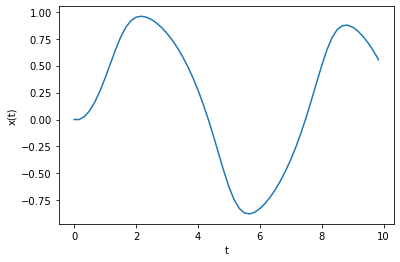

In [10]:
#Método de Euler
from pylab import *

f=lambda x,t: -x**3+sin(t)

a,b=0.0,10.0
N=60
h=(b-a)/N
x=0.0
puntos_t=[]
puntos_x=[]
for t in arange(a,b,h):
    puntos_x.append(x)
    x+=h*f(x,t)  #Metodo de Euler
    puntos_t.append(t)
plot(puntos_t,puntos_x)
xlabel('t')
ylabel('x(t)')
show()

El error de truncamiento o error local es $h^2$. Cada paso tiene este error. Sin embargo, a lo largo de los 1000 pasos, se obtiene un error acumulado o el error global del método numérico.

El error global se obtiene sumando N-1 veces el error local:
$$
\sum_{k=0}^{N-1} \frac{1}{2}h^2\left[\frac{d^2x}{dt^2} \right]_{t=t_k}=
\frac{1}{2}h\sum_{k=0}^{N-1}h\left[\frac{df}{dt} \right]_{t=t_k}\approx
\frac{h}{2}\int_a^b\frac{df}{dt} dt=\frac{h}{2}\left[f(x(b),b)-f(x(a),a)\right]
$$

Entonces, el error global es proporcional a $h$

## Método de Runge-Kutta de orden 2

Cuidado: Extender la serie de Taylor a un orden superior no hace que se mejore la solución (sólo en algunos casos). Para mejorar usaremos el método de Runge-Kutta de segundo orden, o también conocido como el método del punto medio.

Dessarrollando con serie de Taylor alrededor de $t+\frac{1}{2}h$ para $x(t+h)$:

$$
x(t+h)=x(t+\frac{1}{2}h)+\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Haciendo lo mismo para $x(t)$:

$$
x(t)=x(t+\frac{1}{2}h)-\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Restando la segunda expresión de la primera y reacomodando términos:

$$
x(t+h)=x(t)+h\left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)+O(h^{3})
$$

Un detalle importante, no conocemos en realidad $x(t+\frac{1}{2}h)$! 

Para eso usamos el método de Euler, de esta manera podemos escribir:

$$
k_1=hf(x,t)\\
k_2=hf(x+\frac{1}{2}k_1,t+\frac{1}{2}h)\\
x(t+h)=x(t)+k_2
$$


Ya vimos que $x(t+h)$ tiene terminos de $O(h^{3})$ lo cual es aún mejor que el de Euler ($O(h^{2})$). Pero estamos asumiendo que usar Euler para la estimación original no mete terminos en Runge-Kutta en $x(t+h)$ mayores que $O(h^{3})$.

Si haces una demostración correcta de porque este es el caso y lo expones en video tendras medio punto extra sobre esta tarea. (Hint: demuestra que $k_2$ va como $O(h^{3})$, expandiendo en serie de Taylor $f$ y $x$ alrededor de $t+\frac{1}{2}h$)



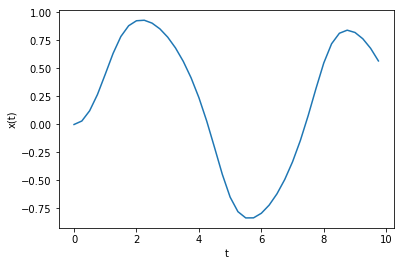

In [3]:
#Runge Kutta de orden 2 o Método del punto medio
from pylab import *

f=lambda x,t: -x**3+sin(t)

a,b=0.0,10.0 #a es la condicion inicial en abscis
N=40
h=(b-a)/N
x=0.0 #segunda condicion, ordenadas
puntos_t=[]
puntos_x=[]
for t in arange(a,b,h):
    puntos_x.append(x)
    k1=h*f(x,t)
    k2=h*f(x+0.5*k1,t+0.5*h)
    x+=k2
    puntos_t.append(t)
plot(puntos_t,puntos_x)
xlabel('t')
ylabel('x(t)')
show()

In [3]:
### Método de Runge-Kutta de orden 4

$$
k_1=hf(x,t)
$$

$$
k_2=hf(x+0.5k_1,t+0.5h)
$$

$$
k_3=hf(x+0.5k_2,t+0.5h)
$$

$$
k_4=hf(x+k_3,t+h)
$$

$$
x(t+h)=x(t)+\frac{(k_1+2k_2+2k_3+k_4)}{6.}
$$

Si haces un vídeo exponiendo correctamente la deducción de Runge-Kutta de órden 4 tienes medio punto extra sobre esta tarea.

Errores en las deducciones y en las implementaciones pueden llevar a resultados que parecen sensatos pero en realidad son erroneos!

Describe un criterio para averiguar rápidamente si el código que resuelve una ecuación diferencial esta mal:

PON AQUI TU RESPUESTA

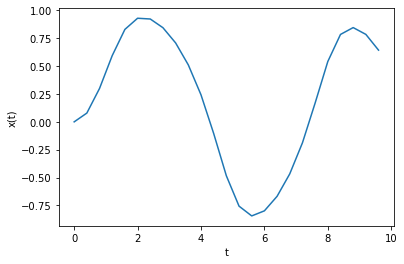

In [12]:
#Runge Kutta de orden 4 
from pylab import *

f=lambda x,t: -x**3+sin(t)

a,b=0.0,10.0
N=25
h=(b-a)/N
x=0.0
puntos_t=[]
puntos_x=[]
for t in arange(a,b,h):
    puntos_x.append(x)
    k1=h*f(x,t)
    k2=h*f(x+0.5*k1,t+0.5*h)
    k3=h*f(x+0.5*k2,t+0.5*h)
    k4=h*f(x+k3,t+h)
    x+=(k1+2*k2+2*k3+k4)/float(6)
    puntos_t.append(t)
plot(puntos_t,puntos_x)
xlabel('t')
ylabel('x(t)')
show()

### Solución sobre valores o rangos infinitos

Hasta el momento, hemos encontrado la solución diferencial de un punto inicial desde una condición inical a una distancia finita en t, pero en algunos casos, necesitamos mapear $t\rightarrow\infty$.

Hacemos un método indirecto

$$u=\frac{t}{1+t}$$ con $t\rightarrow\infty$.

$$t=\frac{u}{1-u}$$ con $u\rightarrow 1$.

Por regla de la cadena

$$\frac{dx}{du}\frac{du}{dt}  = f(x,t)$$
$$\frac{dx}{du} =\frac{dt}{du}f(x,\frac{u}{1-u})$$
pero, $$\frac{dt}{du}=\frac{1}{1-u}^2$$
Entonces, 
$$
\frac{dx}{du}=\frac{1}{(1-u)^2}f(x,\frac{u}{1-u})
$$

Definimos una nueva función

$$
g(x,u)=(1-u)^{-2}f(x,\frac{u}{1-u})
$$

y la ecuación diferencial a programar es

$$
\frac{dx}{du}=g(x,u)
$$

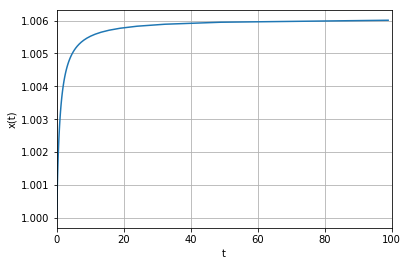

In [5]:
from pylab import *

g=lambda x,u:1/(x**2*(1-u)**2+u**2)
a,b=0.0,1.0
N=100
h=(b-a)/N
lista_u=arange(a,b,h)
lista_t,lista_x=[],[]
x=1.0
for u in lista_u:
    lista_t.append(u/(1-u))
    lista_x.append(x)
    k1=h*g(x,t)
    k2=h*g(x+0.5*k1,t+0.5*h)
    k3=h*g(x+0.5*k2,t+0.5*h)
    k4=h*g(x+k3,t+h)
    x+=(k1+2*k2+2*k3+k4)/float(6)
plot(lista_t,lista_x)
xlim(0,100)
grid(True)
xlabel('t')
ylabel('x(t)')
show()

## Ecuaciones Diferenciales con más de una variable 

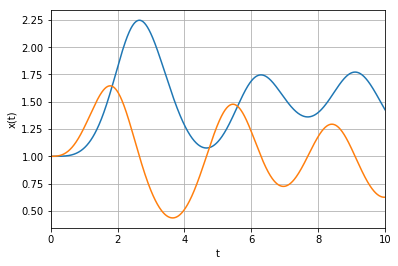

In [6]:
from pylab import *
def f(r,t):
    x=r[0]
    y=r[1]
    fx=x*y-x
    fy=y-x*y+sin(t)**2
    return array([fx,fy],float)
a,b=0.0,10.0
N=1000
h=(b-a)/N
lista_t=arange(a,b,h)
lista_x,lista_y=[],[]
r=array([1.0,1.0],float) #condiciones iniciales
for t in lista_t:   
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
    lista_x.append(r[0])
    lista_y.append(r[1])
plot(lista_t,lista_x)
plot(lista_t,lista_y)
xlim(0,10)
grid(True)
xlabel('t')
ylabel('x(t)')
show()

In [1]:
from pylab import *
def f(r,t):
    x=r[0]
    y=r[1]
    fx=x*y-x
    fy=y-x*y+sin(t)**2
    return array([fx,fy],float)
a,b=0.0,10.0
N=1000
h=(b-a)/N
lista_t=arange(a,b,h)
lista_x,lista_y=[],[]
r=array([1.0,1.0],float) #condiciones iniciales
for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
plot(lista_t,lista_x)
plot(lista_t,lista_y)
xlim(0,10)
grid(True)
xlabel('t')
ylabel('x(t)')
show()

<Figure size 640x480 with 1 Axes>

## Módelo depredador y presa (Lotka-Volterra)

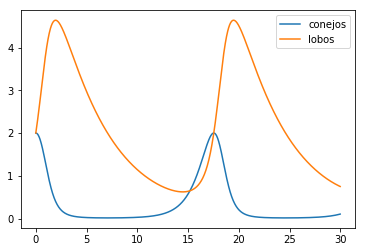

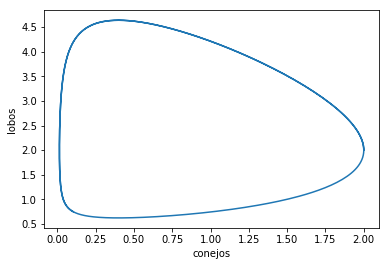

In [8]:
from pylab import *
def f(r,t):
    x=r[0]
    y=r[1]
    fx=alpha*x-beta*x*y
    fy=gamma*x*y-delta*y
    return array([fx,fy],float)
a,b=0.0,30.0
N=1000
h=(b-a)/N
lista_t=arange(a,b,h)
lista_x,lista_y=[],[]
r=array([2.0,2.0],float) #condiciones iniciales
alpha,beta,gamma,delta=1.0,0.5,0.5,0.2
for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
plot(lista_t,lista_x,label='conejos')
plot(lista_t,lista_y,label='lobos')
legend()
show()
plot(lista_x,lista_y) #espacio fase
xlabel('conejos')
ylabel('lobos')
show()

# Atractor de Lorentz

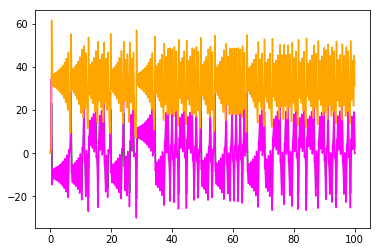

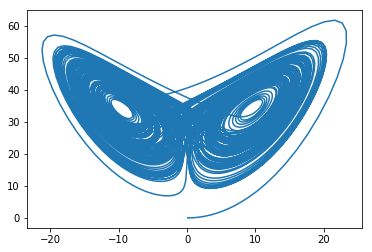

In [9]:
from pylab import *

sigma=10
rr=35
bb=8/3.

def f(r,t):
    x=r[0]
    y=r[1]
    z=r[2]
    fx=sigma*(y-x)
    fy=rr*x-y-x*z
    fz=x*y-bb*z
    return array([fx,fy,fz],float)
a,b=0.0,100.0
N=10000
h=(b-a)/N
lista_t=arange(a,b,h)
lista_x,lista_y,lista_z=[],[],[]
r=array([0,1.0,0.0],float) #condiciones iniciales
for t in lista_t:
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
    lista_x.append(r[0])
    lista_y.append(r[1])
    lista_z.append(r[2])    
plot(lista_t,lista_x,'green')
plot(lista_t,lista_y,'magenta')
plot(lista_t,lista_z,'orange')
show()
plot(lista_x,lista_z) #espacio fase
show()

## Ecuaciones Diferenciales de segundo orden

Consideremos el caso más simple, donde sólo dependemos de la variable x. La forma general de la ecuación es:
$$\frac{dx^2}{dt^2}=f(x,\frac{dx}{dt},t)$$
donde $f$ es una función arbitraria.
El truco es plantear otra variable $y=\frac{dx}{dt}$, tal que el sistema se reduzca a un sistema de dos ecuaciones lineales acopladas:
$$
x=\frac{dy}{dt}\\
y=\frac{dx}{dt}
$$

### Tiro parabólico

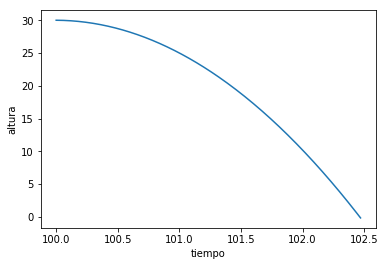

In [10]:
def f(r,t):
    g=-9.81
    x=r[0]
    v=r[1]
    fx=v
    fv=g
    return array([fx,fv],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_v=[]
lista_x = []
lista_t=[]
r=([30.,0.])
while r[0]>0.0:
        k1=h*f(r,t)
        k2=h*f(r+0.5*k1,t+0.5*h)
        k3=h*f(r+0.5*k2,t+0.5*h)
        k4=h*f(r+k3,t+h)
        r+=(k1+2*k2+2*k3+k4)/6.
        t+=h
        lista_x.append(r[0])
        lista_v.append(r[1])
        lista_t.append(t)
plot(lista_t,lista_x)
xlabel('tiempo')
ylabel('altura')
show()